<a href="https://colab.research.google.com/github/ua-datalab/NLP-Speech/blob/main/Natural_Language_Processing_Text_Mining_and_Sentiment_Analysis/Natural_Language_Processing_Text_Mining_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing: Text Mining and Sentiment Analysis

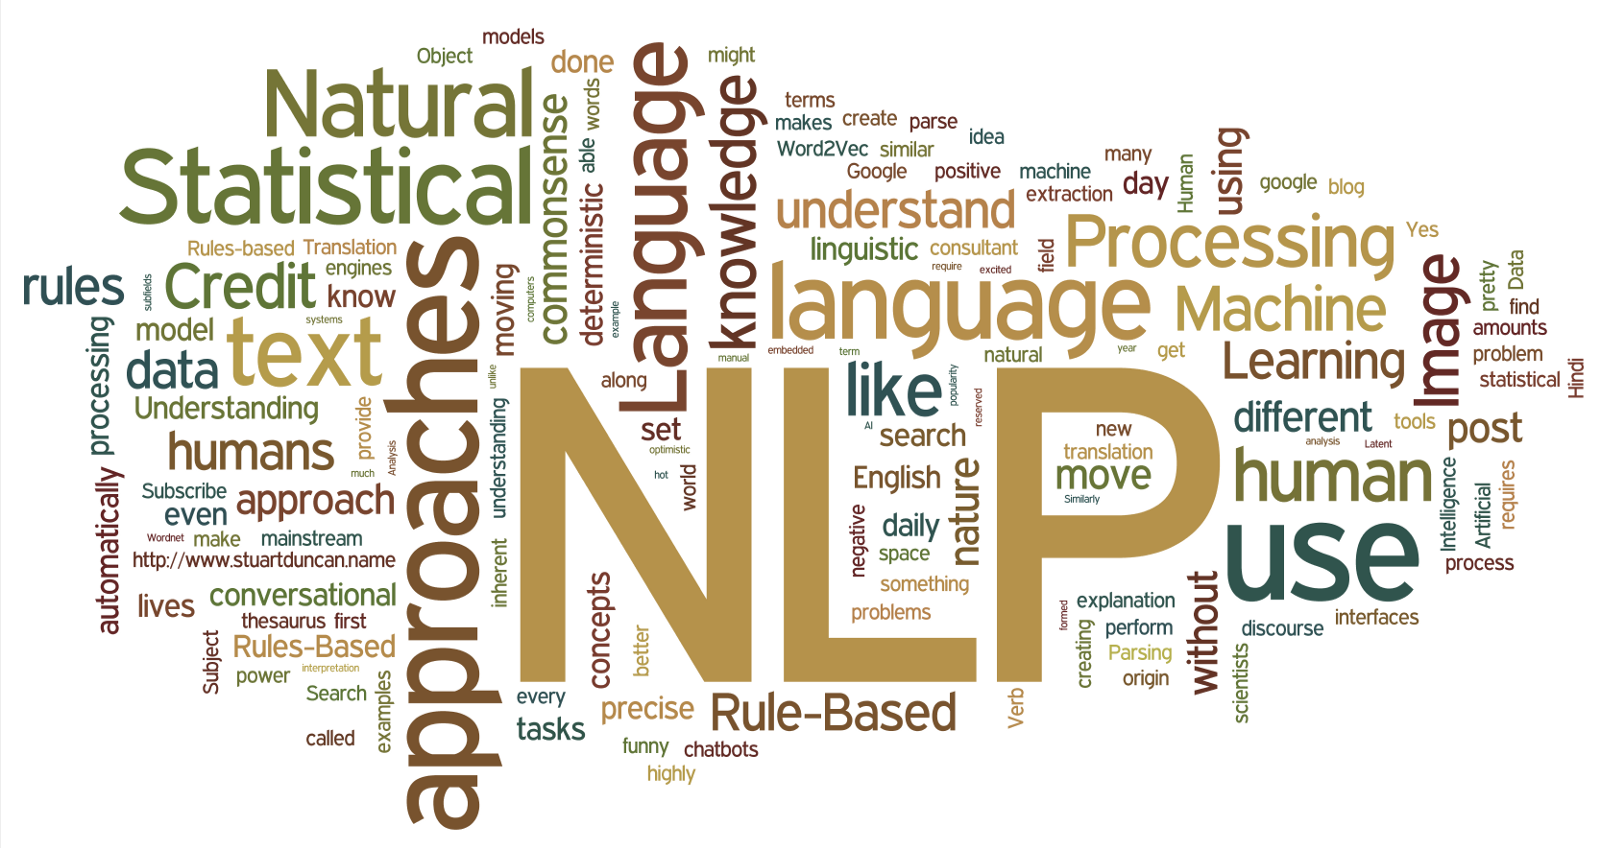

Image credit: https://hpccsystems.com/resources/understanding-natural-language/

#### What is NLP?

Natural language processing (NLP) is a machine-learning technology that automates the interpretation, manipulation, and comprehension of human language by computers, mainly for the purposes of developing Artificial Intelligence. At its heart, it operates on the assumption that most cases where a machine would need to work with natural language, the ability to make statistically viable predictions are enough.

NLP combines expertise and domain language from fields such as statistics, linguistics, machine learning, and deep learning.

The current state-of-the-art systems are Large Language Models, which use billions of lines of human generated (and machine synthesized) text to build predictive models that process language as next token prediction task. The models have been trained on so many millions of combinations of words, phrases and utterances, they are able to mimic human responses to simple as well as complex queries.

#### NLP Applications:
- Sentiment analysis
- Chatbots and Virtual Assistants
- Drug discovery
- Machine translation
- Text summarization
- Spam detection
- Information extraction

Large Language models take a maximalist approach to NLP and researchers now use pre-trained models instead. Consider checkout out our [Deep Learning Workshop](https://github.com/ua-datalab/DLWorkshops/wiki/) to learn more about them!

#### What is SpaCy?

SpaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. It is written with memory constraints and production-quality in mind, and is great for getting started with simple projects. For more about SpaCy, check out their website: https://spacy.io/

SpaCy offers us a NLP pipeline in which the output of every task can be accessed by the users. This gives us a "swiss army knife" approach in which we can use different tools for our task. It also has fantastic and approachable tutorials for you to work on your skills: https://spacy.io/usage/spacy-101

In today's session, we will take a look at some of these tools, and consider use cases for them. This includes:

- Tokenization: Segmenting documents into words, punctuations marks, spaces.
- Stop word and special character removal: cleaning up out document to only keep content and remove noise.
- Lemmatization: identifying the base form of words so that we can extract meaning
- Similarity Calculator: to examine how similar two texts are to each other based on their linguistic features

For a full list, see: https://spacy.io/usage/spacy-101#features


#### How does SpaCy work?

When we load the SpaCy library, we also need to set up and load one of the many language pipeline that SpaCy offers. These contain various kinds of tags and annotations about words belonging to a language, that help SpaCy process a big document.

## The Spacy Pipeline

Image credit: https://course.spacy.io/en/

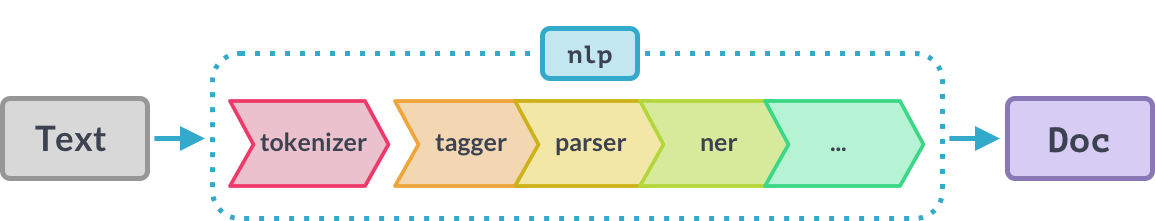

## Setup and Loading

In [ ]:
# import spacy library
import spacy
## Setup if spacy import fails
# !pip install -U spacy
# ! python -m spacy validate

## use spacy.cli to do the same thing, but with a the Spacy Command Line Interface:
spacy.cli.download("en_core_web_md")

Link to SpaCy language libraries: [https://spacy.io/usage/models](https://spacy.io/usage/models)


In [ ]:

#Load the English pipeline- if you have error uncomment line 8 in
# previous codeblock
eng = spacy.load("en_core_web_md")

#Test the pipeline

sent = "The horror genre has ancient origins, with roots in folklore and \
religious traditions focusing on death, the afterlife, evil,\
 the demonic and the principle of the thing embodied in the person."
#Process the document
processed_doc = eng(sent)
#Print contents
print([i.text for i in processed_doc[:5]])

## Some terminology

- Document: the entirety of a text span. This can be one or many sentences.
- Span: a portion or slice of a sentence, defined by the user.
- Token: a word or character.
- Sentence: a meaningful grammatical structure. SpaCy identifies them using stop punctuation.
- Vocab: a cluster of data entries in which each entry has one unique hash.
- Lexeme: an entry in the vocab.

Image credit: https://course.spacy.io/en/chapter2

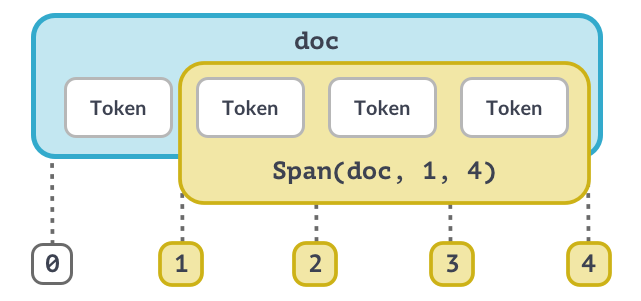

In [ ]:
# process a document with our language pipeline
doc = eng("The horror genre has ancient origins, with roots in folklore and \
religious traditions focusing on death, the afterlife, evil, \
the demonic and the principle of the thing embodied in the person. \
These manifested in stories of beings such as demons, witches, \
vampires, werewolves and ghosts. \
European horror-fiction became established through works of the Ancient Greeks \
and Ancient Romans. Mary Shelley's well-known 1818 novel about Frankenstein was \
greatly influenced by the story of Hippolytus, whom Asclepius revives from death. \
Euripides wrote plays based on the story, Hippolytos Kalyptomenos and Hippolytus.")
print(doc[5])


## Tokenization

In [ ]:
print("ALL WORDS: ", doc[:10])

## Spans and Sentences

In [ ]:
## Print spans

print(f"a span: \"{doc[:10]}\" \n")

## Print sentences

#.sents is the method for using the SpaCy algorithm to identify sentences:
sent_list = []
for sent in list(doc.sents):
  print(f"sentence: \"{sent}\" \n")
  sent_list.append(sent)

In [ ]:
# Accessing vocabulary items
hash = eng.vocab.strings["beings"]
string = eng.vocab.strings[hash]
print(hash, string)

### Access tokens by type

In [ ]:
#Access a list of all words and print it:
print("is_alpha:", [ token for token in doc[:15] if token.is_alpha])

In [8]:
##TRY IT YOURSELF
## Can you try and print all punctuation using is_punct?

## Assigning Linguistic Features to Tokens

SpaCy's linguistic annotations can be accessed by running text through the langauge pipeline, and then calling the annotation by name. Note the use of underscore `_` for calling the English name of the label.

#### Lemma

In [ ]:
for token in doc[:20]:
  # Print the text and the predicted part-of-speech tags
  # IF the lemma and text are not identical
  if token.text != token.lemma_:
      print(f"token: \"{token.text}\", lemma: \"{token.lemma_}\", \
       lemma label: {token.lemma}")

#### Part-of-Speech tag

This tells us the grammatical type of a given token

In [ ]:
# Print the text and the predicted part-of-speech tag
for token in doc[:10]:
    print(f"token: {token.text}, \t POS Tag: {token.pos}, \
     \t POS Label: {token.pos_}")

#### Syntactic Dependency

This provides us with labels that give us insights on the reationships between different words in a sentence.

SpaCy predicts the dependency label (accessed with `.dep_`). For each token, we can also print the syntactic head:

In [ ]:
print('text\t\tpos_\tdep_\thead')
for token in sent_list[1]:
    print(f'{token.text}\t\t{token.pos_}\
          \t{token.dep_}\t{token.head.text}')

#### Named Entity Recognition

In [ ]:
print(sent_list[1])
for token in sent_list[1].ents:
    print(token.text, token.label_)

#### Processing Stop Words and Punctuation

In [ ]:
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Print first 10 tokens:
print(doc[:10])

# Create a for loop to only access non-stop words
# that are not labelled as punctuation:
for token in doc[:10]:
  if token.text not in stopwords and not token.is_punct:
    print(token)

#### What if I don't know what the tags mean?

We cna use the `explain` method to access the definitions for different tags:

In [ ]:
print(spacy.explain("NNP"))
print(spacy.explain("NOUN"))

## Similarity Calculator

How does spaCy predict similarity?

Similarity is determined using **word vectors**, which is a mathematical way of representing every word in a vocabulary. SpaCy generates these using an algorithm like Word2Vec and a lot of training text.


In [ ]:
# Load a larger pipeline with vectors
eng = spacy.load("en_core_web_md")

# Compare two documents
doc1 = eng("I like horror movies")
doc2 = eng("I like scary films")
print(f"similarity score for \"{doc1}\" and \"{doc2}\" is: \
{doc1.similarity(doc2)}")


**TRY THIS YOURSELF!!**

In [ ]:
# Compare two spans- Test yout skills!

# Create spans for "Legally Blond is a comedy" and
# "Friday the Thirteenth is a thriller"
span1 = "slasher is a genre of horror"
span2 = "body horror a type of scary movie "

# Get the similarity of the spans
similarity = ____.____(____)
print(similarity)


#### Vectors

In [ ]:
# Process a text
phrase = language_pipeline = eng("Horror is horrifying")

# Get the vector for the token "Halloween"
phrase_vector = phrase.vector
print(len(phrase), len(phrase_vector),\
      "\n", phrase_vector)

### Searching for Lemmas by POS tag

- Searching for all instances of "slash" but only when it is used as a noun (so "slasher" would be picked up, but not "to slash")

In [ ]:
doc1 = eng("That love is obsessive")
doc3 = eng("You love me")

print([(token.lemma_, token.pos_ )for token in doc1])
print([(token.lemma_, token.pos_ )for token in doc3])

def pos_matching(text):
  if 'love' in [token.lemma_ for token in text] \
   and 'VERB' in [token.pos_ for token in text]:
    print(f"\"{text}\" is a match")
  else:
    print("not a match")
  return None


In [ ]:
pos_matching(doc1)
pos_matching(doc3)


## Group project Loading a text corpus and setting up a processing pipeline

In [ ]:
# Code for loading Movie review dataset:\
# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
# We downsampled the dataset to create a subset with 1k random reviews, which you can download using the codebox below:

In [20]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ua-datalab/MLWorkshops/\
main/Natural_Language_Processing_Text_Mining_and_Sentiment_Analysis/\
IMDB_downsampled.csv'
df = pd.read_csv(url)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   review      10000 non-null  object
 2   sentiment   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [22]:
df.head()

,Unnamed: 0,review,sentiment
0,13524,With stunning cinematography and a thread of K...,positive
1,14825,William H. Macy is terrific in this Alfred Hit...,positive
2,29910,In this TV special Jon is the one who needs a ...,positive
3,32850,*BE WARNED OF POSSIBLE SPOILERS*<br /><br />A ...,positive
4,33531,Let's face it; Nancy Drew was never great lite...,positive


In [23]:
df.tail()

,Unnamed: 0,review,sentiment
9995,43753,"Spreading panic from Broadway to Bombay, 1957'...",negative
9996,13871,"Ed Gein, one of the most famous serial killers...",negative
9997,20269,I don't know if the problem I had with this mo...,negative
9998,19524,"Two years after this movie was made, ""The Juro...",negative
9999,34624,Unless you're interested in seeing 2 hours wor...,negative


In [24]:
#test dataset by running parser on a few sentences
df['review']

,review
0,With stunning cinematography and a thread of K...
1,William H. Macy is terrific in this Alfred Hit...
2,In this TV special Jon is the one who needs a ...
3,*BE WARNED OF POSSIBLE SPOILERS*<br /><br />A ...
4,Let's face it; Nancy Drew was never great lite...
...,...
9995,"Spreading panic from Broadway to Bombay, 1957'..."
9996,"Ed Gein, one of the most famous serial killers..."
9997,I don't know if the problem I had with this mo...
9998,"Two years after this movie was made, ""The Juro..."


In [25]:
# downsampling to 500 in order for the workbook to run quickly. You can change this to work with more or less data
df_downsample = df.sample(n=500, replace=False, axis=0)
df_downsample.head()

,Unnamed: 0,review,sentiment
332,32299,I think this movie more than any other shows w...,positive
1479,42271,In the opening scenes of this movie a man shot...,positive
7631,56,The Hills Have Eyes II is what you would expec...,negative
8150,15905,The storyline is a ticked off claim jumper mad...,negative
589,20254,"This film has, over the past ten years, become...",positive


In [26]:
# create a new column in the data frame with only content words
stopwords = spacy.lang.en.stop_words.STOP_WORDS #create filter for stop words


# Uses an anonymous function (lambda) to pick out lemma_s where the lemma is not
# a stop word or punctionation
df_downsample['content_words'] = df_downsample.review.apply(lambda text:
                                     " ".join(token.lemma_ for token in eng(text)
                                     if not token.is_stop and not token.is_punct))

## A simple NLP task
- Create a custom list of words to search for horror movies, as a group.*italicized text*
- search for words in list in title, collect matches
- search for words in list in each review, collect matches
- Compare both searches to see which on yields a better list
- Run similarity calculator on reviews

In [28]:
## Only pick positive reviews:
df_downsample = df_downsample[df_downsample['sentiment']== 'positive']
# You can also work with negative reviews for a "bad movie" night!

In [27]:
# Create a phrase matcher using Spacy's English vocabulary
# and the PhraseMatcher class:
import spacy
from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(eng.vocab)

### LET'S MAKE A LIST OF HORROR TOKENS FOR THE PHRASE MATCHER
phrases = ["body horror", "slasher", "apocalypse", "revenge",\
           "undead", "thriller", "werewolves", "demon"]


In [29]:
# Building the rule for phrase matching:

patterns = [eng(text) for text in phrases]
phrase_matcher.add('ghosts', None, *patterns)


In [ ]:
# add loop for reading reviews, and only using positive sentiment reviews
for _, row in df_downsample.iterrows():
  doc = eng(row['content_words'])
  matches = phrase_matcher(doc)
  if matches:
    print(f"match found!: {row['Unnamed: 0']} \n {row['review']}")

In [ ]:
# We ran this pipeline for 500 positive reviews, to look for horror movies with a custom set of keywords
# What are your thoughts on the quality of the output?
# What other spacy tools do you think we could use for this task?

## SpaCy Resources

- [spaCy landing page](https://spacy.io)
- [spaCy docs](https://spacy.io/api)